## Ćwiczenie 2 - Analiza sygnałów okresowych w dziedzinie częstotliwości

### 1) Wygenerowanie ciągu probek fali sinosuidalnej
Pierwszym krokiem było wygenerowanie sygnału sinusoidalnego o częstotliwości 50 Hz i długości 65536 próbek. Użyto do tego biblioteki numpy oraz matplotlib do wizualizacji wyników.

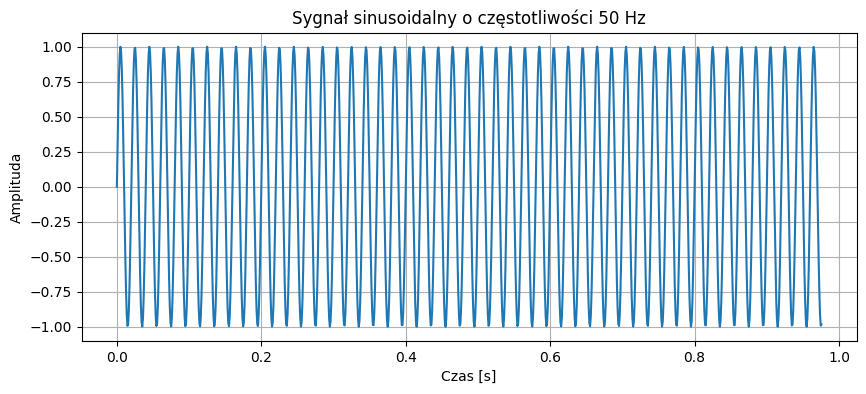

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f = 50 # Częstotliwość sygnału w Hz
sig_len = 65536 # Liczba próbek
fs = 1024  #mozna eksperymentować z tym parametrem, jedynie musi być większy od 100Hz

# Generowanie ciągu próbek
x = np.arange(sig_len) /fs #t
y = np.sin(2 * np.pi * f * x) #sygnal

# Rysowanie
plt.figure(figsize=(10, 4))
plt.plot(x[:1000], y[:1000])
plt.title('Sygnał sinusoidalny o częstotliwości 50 Hz')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

## 2) Dyskretna transformata Fouriera i widmo amplitudowe
W kolejnym kroku wyznaczono dyskretną transformatę Fouriera (DFT) wygenerowanego sygnału i przedstawiono jego widmo amplitudowe.


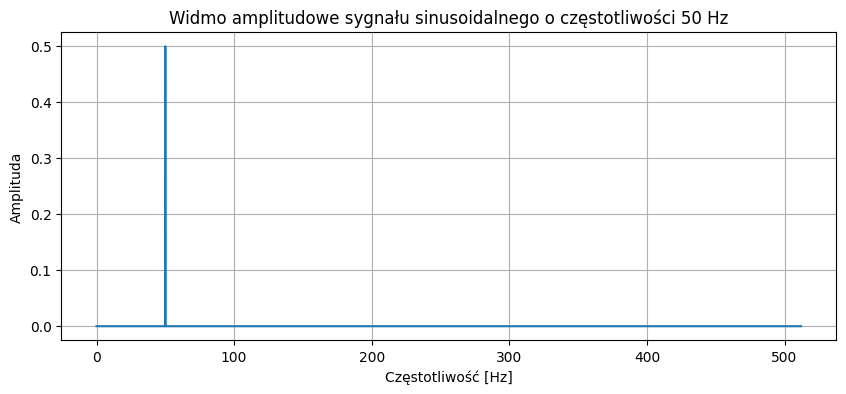

In [10]:
# Wyznaczanie DFT sygnału
y_fft = np.fft.fft(y)  #rozwiązanie zadania 2.2. do pokazania użyć y_fft[:dlugosc//2]

# Wyznaczanie widma amplitudowego
amplitude_spectrum = np.abs(y_fft) / sig_len
x_fft = np.fft.fftfreq(sig_len, 1/fs)  #rozwiązanie zadania 2.2. do pokazania użyć numpy.abs(x_fft[:dlugosc//2])

plt.figure(figsize=(10, 4))
plt.plot(x_fft[:sig_len//2], amplitude_spectrum[:sig_len//2])
plt.title('Widmo amplitudowe sygnału sinusoidalnego o częstotliwości 50 Hz')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

## 3) Generowanie mieszaniny dwóch fal sinusoidalnych i analiza widma
Następnie wygenerowano sygnał będący mieszaniną fal o częstotliwościach 50 Hz i 60 Hz oraz przeprowadzono na nim DFT.


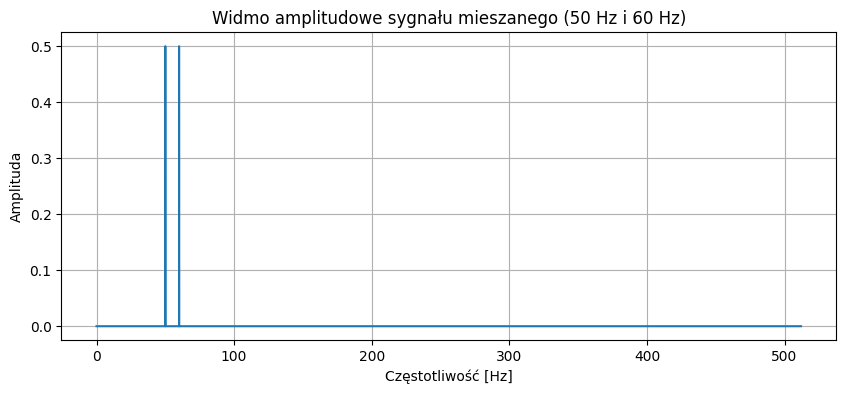

In [11]:
# Parametry sygnału mieszanego
f1 = 50  # Pierwsza częstotliwość w Hz
f2 = 60  # Druga częstotliwość w Hz

# Generowanie sygnału mieszanego
mixed_y = np.sin(2 * np.pi * f1 * x) + np.sin(2 * np.pi * f2 * x)

# Wyznaczanie DFT sygnału mieszanego
fft_mixed_signal = np.fft.fft(mixed_y)


# Wyznaczanie widma amplitudowego
amplitude_spectrum_mixed = np.abs(fft_mixed_signal) / sig_len

# Wyświetlanie widma amplitudowego w zakresie [0, fs/2]
plt.figure(figsize=(10, 4))
plt.plot(x_fft[:sig_len//2], amplitude_spectrum_mixed[:sig_len//2])
plt.title('Widmo amplitudowe sygnału mieszanego (50 Hz i 60 Hz)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

## 4) Eksperymenty dla różnych częstotliwości próbkowania
Przeprowadzono eksperymenty dla różnych częstotliwości próbkowania, zmieniając wartość fs i powtarzając poprzednie kroki.
**Przykład dla fs = 2048 Hz** 

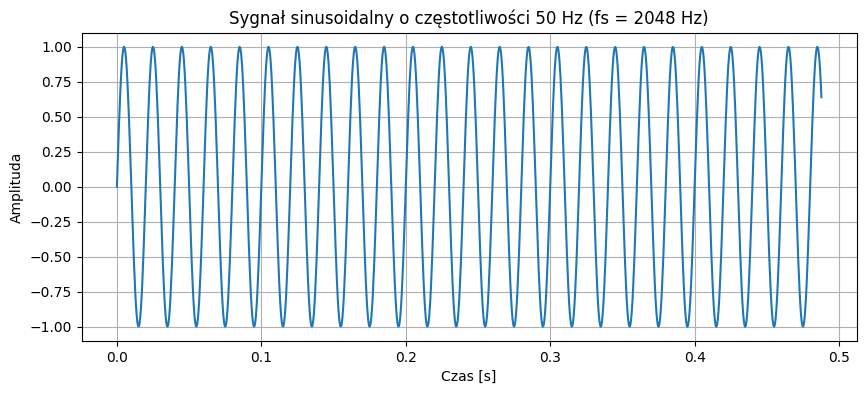

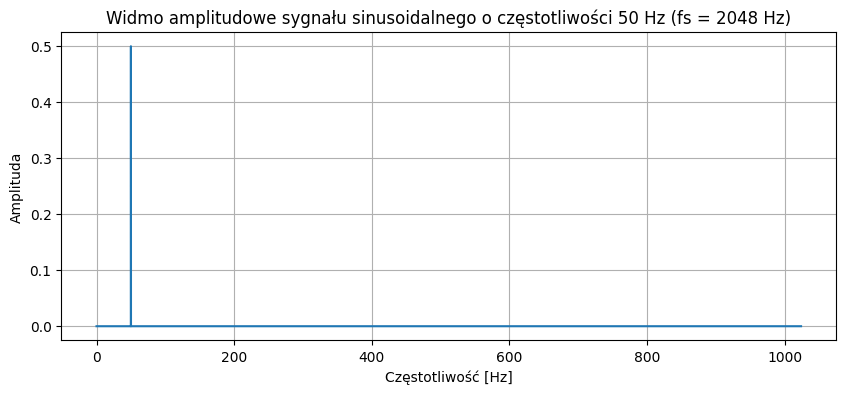

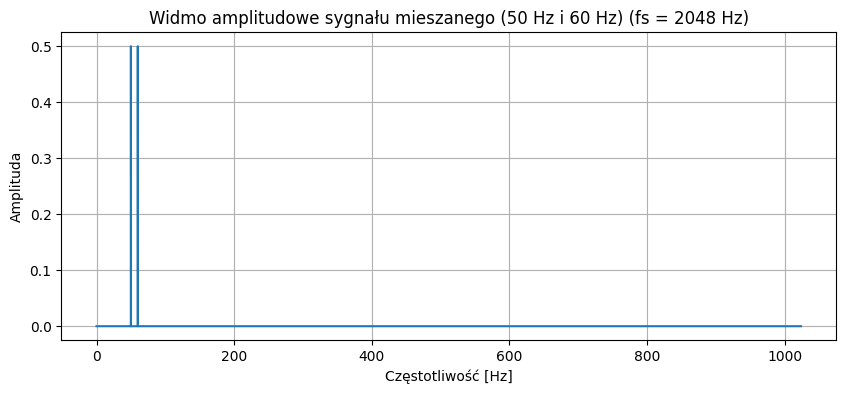

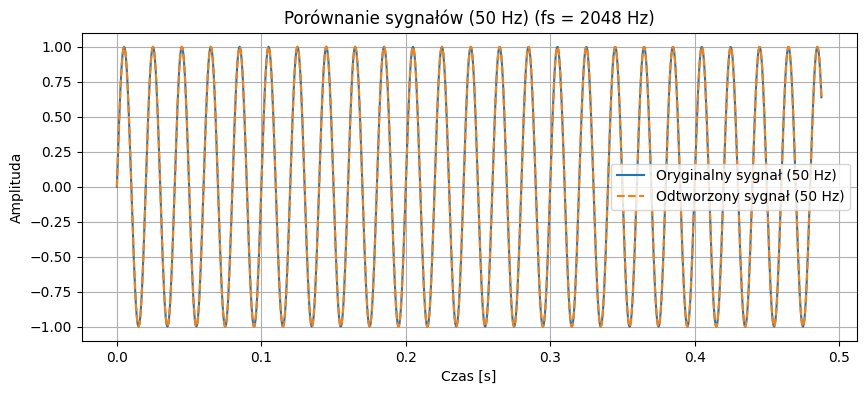

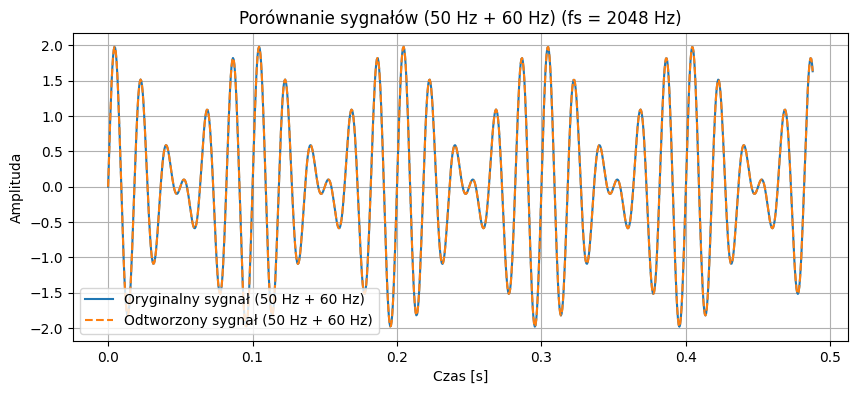

In [12]:
# Parametry sygnału
fs_2048 = 2048  # Częstotliwość próbkowania w Hz
N_2048 = 65536  # Liczba próbek

# Generowanie ciągu próbek
t_2048 = np.arange(N_2048) / fs_2048
signal_2048 = np.sin(2 * np.pi * f * t_2048)

# Wyznaczanie DFT sygnału
fft_signal_2048 = np.fft.fft(signal_2048)

# Wyznaczanie widma amplitudowego
amplitude_spectrum_2048 = np.abs(fft_signal_2048) / N_2048
frequencies_2048 = np.fft.fftfreq(N_2048, 1 / fs_2048)

# Generowanie sygnału mieszanego
mixed_signal_2048 = np.sin(2 * np.pi * f1 * t_2048) + np.sin(2 * np.pi * f2 * t_2048)

# Wyznaczanie DFT sygnału mieszanego
fft_mixed_signal_2048 = np.fft.fft(mixed_signal_2048)

# Wyznaczanie widma amplitudowego sygnału mieszanego
amplitude_spectrum_mixed_2048 = np.abs(fft_mixed_signal_2048) / N_2048

# Odwrotna transformata Fouriera dla sygnału sinusoidalnego
ifft_signal_2048 = np.fft.ifft(fft_signal_2048)

# Odwrotna transformata Fouriera dla sygnału mieszanego
ifft_mixed_signal_2048 = np.fft.ifft(fft_mixed_signal_2048)

# Rysowanie wyników dla fs = 2048 Hz

# Sygnał sinusoidalny o częstotliwości 50 Hz
plt.figure(figsize=(10, 4))
plt.plot(t_2048[:1000], signal_2048[:1000])
plt.title('Sygnał sinusoidalny o częstotliwości 50 Hz (fs = 2048 Hz)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Widmo amplitudowe sygnału sinusoidalnego o częstotliwości 50 Hz
plt.figure(figsize=(10, 4))
plt.plot(frequencies_2048[:N_2048//2], amplitude_spectrum_2048[:N_2048//2])
plt.title('Widmo amplitudowe sygnału sinusoidalnego o częstotliwości 50 Hz (fs = 2048 Hz)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Widmo amplitudowe sygnału mieszanego (50 Hz i 60 Hz)
plt.figure(figsize=(10, 4))
plt.plot(frequencies_2048[:N_2048//2], amplitude_spectrum_mixed_2048[:N_2048//2])
plt.title('Widmo amplitudowe sygnału mieszanego (50 Hz i 60 Hz) (fs = 2048 Hz)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Porównanie oryginalnych i odtworzonych sygnałów
plt.figure(figsize=(10, 4))
plt.plot(t_2048[:1000], signal_2048[:1000], label='Oryginalny sygnał (50 Hz)')
plt.plot(t_2048[:1000], ifft_signal_2048[:1000].real, label='Odtworzony sygnał (50 Hz)', linestyle='--')
plt.title('Porównanie sygnałów (50 Hz) (fs = 2048 Hz)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t_2048[:1000], mixed_signal_2048[:1000], label='Oryginalny sygnał (50 Hz + 60 Hz)')
plt.plot(t_2048[:1000], ifft_mixed_signal_2048[:1000].real, label='Odtworzony sygnał (50 Hz + 60 Hz)', linestyle='--')
plt.title('Porównanie sygnałów (50 Hz + 60 Hz) (fs = 2048 Hz)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()


## 5) Wyznaczanie odwrotnych transformat Fouriera
Wyznaczono odwrotne transformaty Fouriera dla wyznaczonych wcześniej sygnałów i porównano je z oryginalnymi sygnałami.


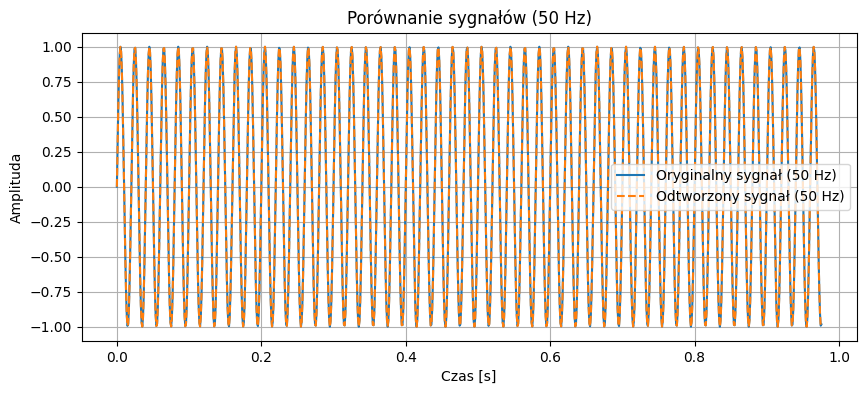

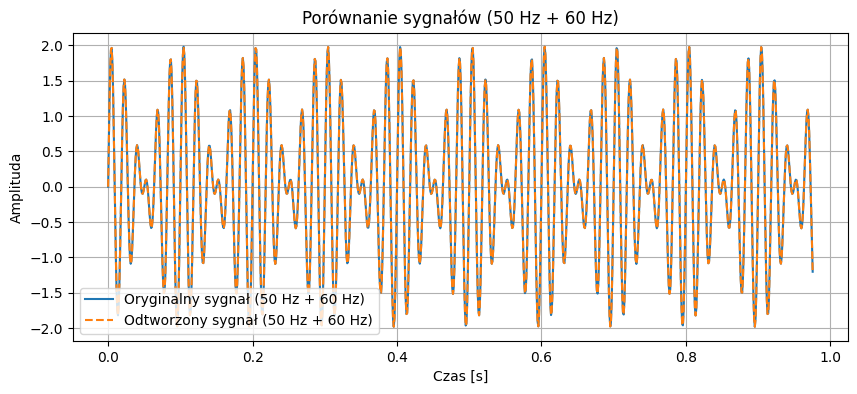

In [13]:
# Odwrotna transformata Fouriera dla sygnału sinusoidalnego
ifft_signal = np.fft.ifft(y_fft)

# Odwrotna transformata Fouriera dla sygnału mieszanego
ifft_mixed_signal = np.fft.ifft(fft_mixed_signal)

# Porównanie oryginalnych i odtworzonych sygnałów
plt.figure(figsize=(10, 4))
plt.plot(x[:1000], y[:1000], label='Oryginalny sygnał (50 Hz)')
plt.plot(x[:1000], ifft_signal[:1000].real, label='Odtworzony sygnał (50 Hz)', linestyle='--')
plt.title('Porównanie sygnałów (50 Hz)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(x[:1000], mixed_y[:1000], label='Oryginalny sygnał (50 Hz + 60 Hz)')
plt.plot(x[:1000], ifft_mixed_signal[:1000].real, label='Odtworzony sygnał (50 Hz + 60 Hz)', linestyle='--')
plt.title('Porównanie sygnałów (50 Hz + 60 Hz)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()